In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\vpipe\Downloads\HR_analytics.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
num_left = df["left"].value_counts()

In [5]:
df.rename(columns={"average_montly_hours":"average_monthly_hours"}, inplace=True)

In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
num_left.values

array([11428,  3571], dtype=int64)

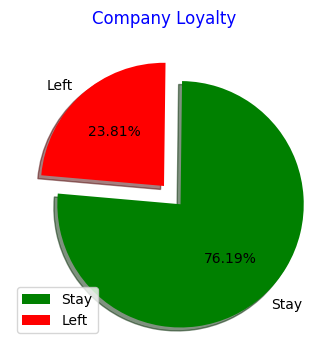

In [8]:
x = num_left.values
retention = ["Stay", "Left"]
plt.figure(figsize= (5,4))
plt.pie(x, labels = retention, colors= ["green", "red"], autopct= "%.2f%%", shadow=True, explode=[0.2,0], startangle=175)
plt.title("Company Loyalty", color= "blue")
plt.legend(loc="lower left")
plt.show;

In [9]:
avg_sat_lvl=df.groupby("left")["satisfaction_level"].mean()

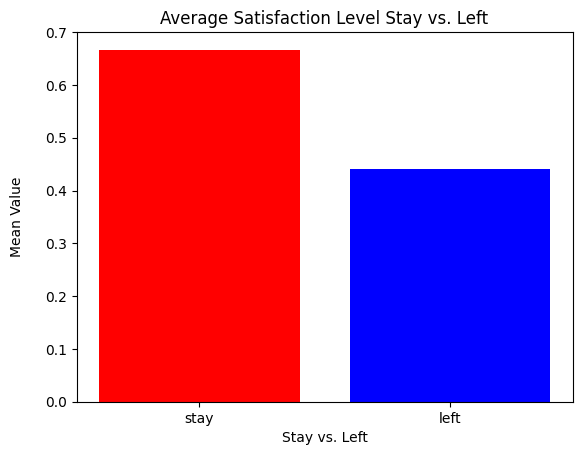

In [10]:
plt.bar(["stay","left"], avg_sat_lvl.values, color=["red", "blue"])
plt.title("Average Satisfaction Level Stay vs. Left")
plt.xlabel("Stay vs. Left")
plt.ylabel("Mean Value", labelpad=15)
plt.show();

In [11]:
pd.crosstab(df["salary"], df["left"])

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

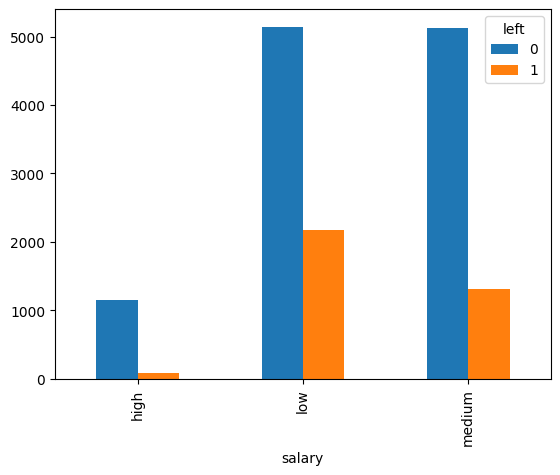

In [12]:
pd.crosstab(df["salary"], df["left"]).plot(kind="bar")

In [13]:
avg_mon_lvl=df.groupby("left")["average_monthly_hours"].mean()

In [14]:
avg_mon_lvl

left
0    199.060203
1    207.419210
Name: average_monthly_hours, dtype: float64

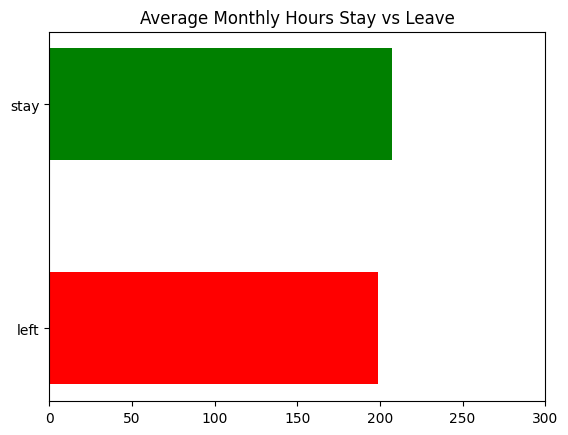

In [15]:
plt.barh(["left", "stay"],avg_mon_lvl.values, height=0.5, color=["red","green"])
plt.xlim(0,300)
plt.title("Average Monthly Hours Stay vs Leave")
plt.show();

In [16]:
pd.crosstab(df["promotion_last_5years"], df["left"])

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [17]:
median = df["last_evaluation"].median()
median

0.72

In [18]:
#conditions:
df["evaluation_comparison"]= ["good_eval" if val>median else "bad_eval" for val in df["last_evaluation"]]
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,evaluation_comparison
0,0.38,0.53,2,157,3,0,1,0,sales,low,bad_eval
1,0.80,0.86,5,262,6,0,1,0,sales,medium,good_eval
2,0.11,0.88,7,272,4,0,1,0,sales,medium,good_eval
3,0.72,0.87,5,223,5,0,1,0,sales,low,good_eval
4,0.37,0.52,2,159,3,0,1,0,sales,low,bad_eval


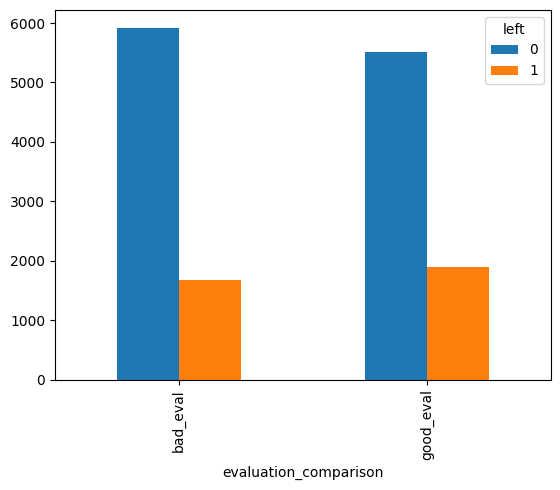

In [19]:
pd.crosstab(df["evaluation_comparison"],df["left"]).plot(kind="bar");

In [20]:
df["time_spend_company"].value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

In [21]:
mean=df["time_spend_company"].mean()
mean

3.498233215547703

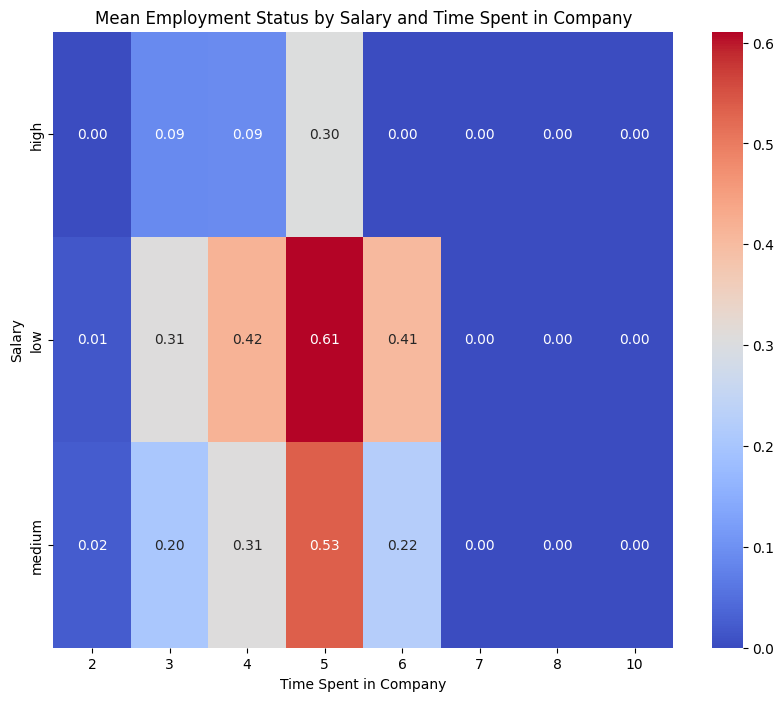

In [22]:
new = pd.crosstab(index=df['salary'], columns=df['time_spend_company'], values=df['left'], aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mean Employment Status by Salary and Time Spent in Company")
plt.xlabel("Time Spent in Company")
plt.ylabel("Salary")
plt.show()


In [23]:
condition= df["time_spend_company"] ==5
fifthyear= df[condition]
fifthyear

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,evaluation_comparison
3,0.72,0.87,5,223,5,0,1,0,sales,low,good_eval
7,0.92,0.85,5,259,5,0,1,0,sales,low,good_eval
8,0.89,1.00,5,224,5,0,1,0,sales,low,good_eval
12,0.84,0.92,4,234,5,0,1,0,sales,low,good_eval
19,0.76,0.89,5,262,5,0,1,0,sales,low,good_eval
...,...,...,...,...,...,...,...,...,...,...,...
14970,0.78,0.93,4,225,5,0,1,0,sales,medium,good_eval
14980,0.76,0.89,5,238,5,0,1,0,technical,high,good_eval
14983,0.72,0.84,5,257,5,0,1,0,technical,medium,good_eval
14985,0.91,0.99,5,254,5,0,1,0,technical,medium,good_eval


<Axes: title={'center': 'Salary Comparison for Fifth-Year Employees vs Left'}, xlabel='salary'>

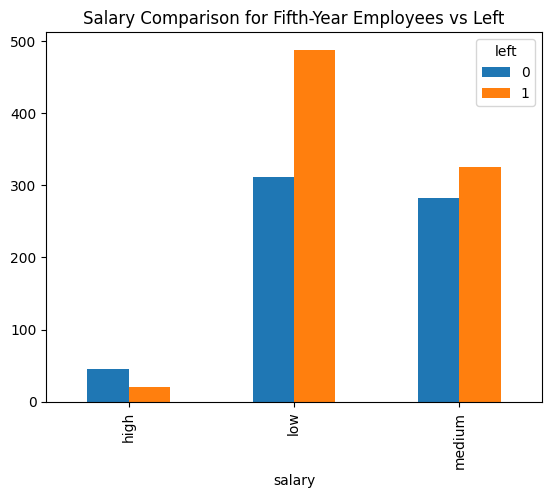

In [24]:
pd.crosstab(index=[fifthyear['salary']], columns=[fifthyear['left']]).plot(kind="bar", title="Salary Comparison for Fifth-Year Employees vs Left")

<Axes: title={'center': 'Department-wise Comparison of Fifth Year Employees'}, xlabel='Department'>

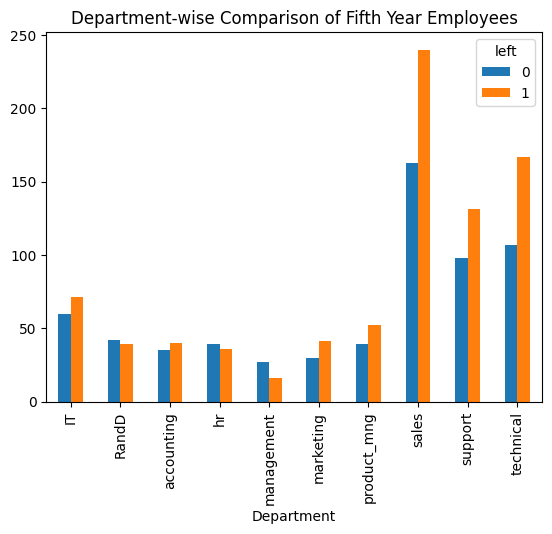

In [32]:
pd.crosstab(index=[fifthyear['Department']], columns=[fifthyear['left']], ).plot(kind="bar",title="Department-wise Comparison of Fifth Year Employees")

<Axes: title={'center': 'Comparison of Number of Projects for Fifth-Year Employees'}, xlabel='number_project'>

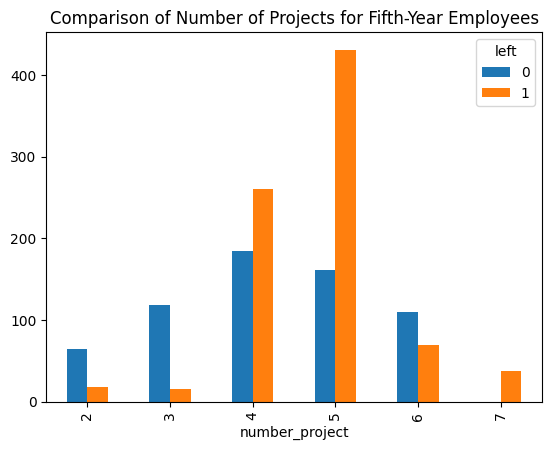

In [33]:
pd.crosstab(index=[fifthyear['number_project']], columns=[fifthyear['left']]).plot(kind="bar",title="Comparison of Number of Projects for Fifth-Year Employees")

In [34]:
condition=(df["time_spend_company"]==5) & (df["number_project"]==6)
filtered_df=df.loc[condition]
filtered_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,evaluation_comparison
62,0.10,0.95,6,244,5,0,1,0,IT,medium,good_eval
123,0.11,0.84,6,300,5,1,1,0,support,low,good_eval
179,0.11,0.85,6,308,5,0,1,0,sales,medium,good_eval
350,0.09,0.80,6,304,5,0,1,0,technical,medium,good_eval
354,0.33,0.88,6,219,5,0,1,0,support,low,good_eval
...,...,...,...,...,...,...,...,...,...,...,...
14608,0.09,0.79,6,293,5,0,1,0,sales,low,good_eval
14656,0.09,0.94,6,283,5,0,1,0,IT,low,good_eval
14716,0.11,0.97,6,289,5,0,1,0,support,medium,good_eval
14739,0.09,0.80,6,301,5,0,1,0,IT,medium,good_eval


<Axes: title={'center': 'Average Monthly Hours Above Median With 6 Projects vs Left'}, xlabel='average_monthly_hours'>

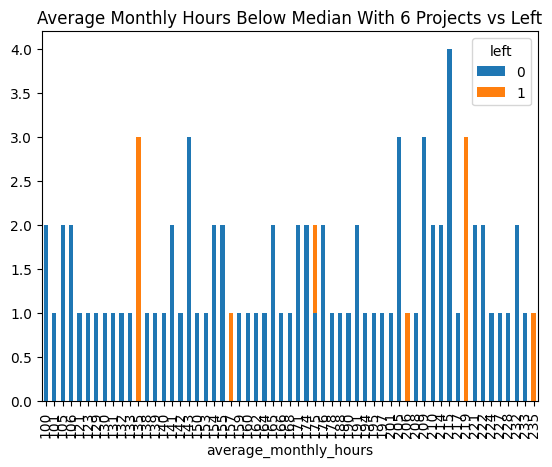

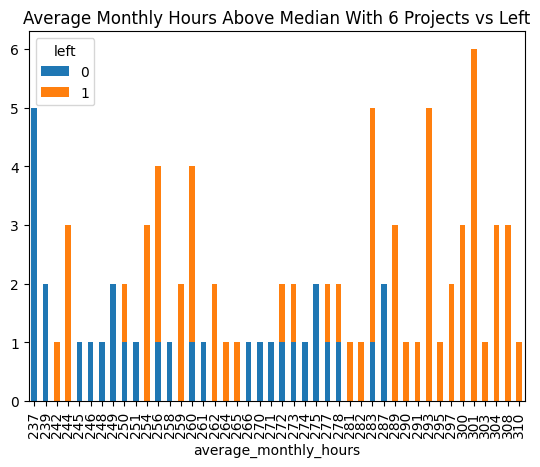

In [35]:
median_hours= filtered_df["average_monthly_hours"].median()
below_median = filtered_df[filtered_df['average_monthly_hours'] < median_hours]
above_median = filtered_df[filtered_df['average_monthly_hours'] >= median_hours]
below_median_cross_tab = pd.crosstab(index=below_median['average_monthly_hours'], columns=below_median['left'])
above_median_cross_tab = pd.crosstab(index=above_median['average_monthly_hours'], columns=above_median['left'])
below_median_cross_tab.plot(kind='bar', stacked=True, title='Average Monthly Hours Below Median With 6 Projects vs Left')
above_median_cross_tab.plot(kind='bar', stacked=True, title='Average Monthly Hours Above Median With 6 Projects vs Left')

<Axes: title={'center': 'Median Average Monthly Hours With 6 Projects vs Left'}, xlabel='hour_group'>

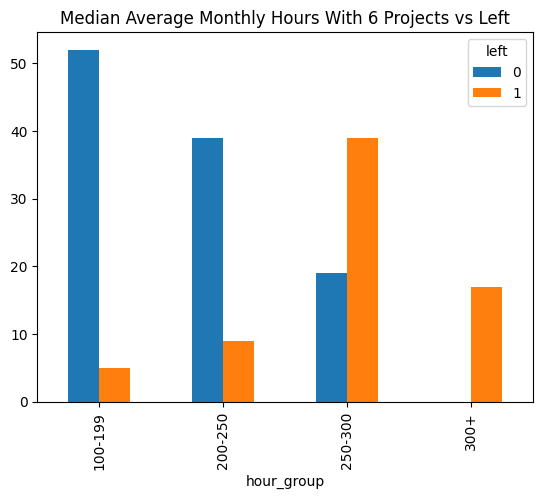

In [36]:
bins = [100, 200,250, 300, float('inf')]
labels = ['100-199', '200-250','250-300', '300+']
filtered_df = filtered_df.assign(hour_group=pd.cut(filtered_df['average_monthly_hours'], bins=bins, labels=labels, right=False))
pd.crosstab(index=filtered_df['hour_group'], columns=filtered_df['left']).plot(kind="bar", title="Median Average Monthly Hours With 6 Projects vs Left")

In [37]:
new_condition=(df["time_spend_company"]==5) & (df["number_project"]<=5)
filtered_df_1=df.loc[new_condition]
filtered_df_1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,evaluation_comparison
3,0.72,0.87,5,223,5,0,1,0,sales,low,good_eval
7,0.92,0.85,5,259,5,0,1,0,sales,low,good_eval
8,0.89,1.00,5,224,5,0,1,0,sales,low,good_eval
12,0.84,0.92,4,234,5,0,1,0,sales,low,good_eval
19,0.76,0.89,5,262,5,0,1,0,sales,low,good_eval
...,...,...,...,...,...,...,...,...,...,...,...
14970,0.78,0.93,4,225,5,0,1,0,sales,medium,good_eval
14980,0.76,0.89,5,238,5,0,1,0,technical,high,good_eval
14983,0.72,0.84,5,257,5,0,1,0,technical,medium,good_eval
14985,0.91,0.99,5,254,5,0,1,0,technical,medium,good_eval


<Axes: title={'center': 'Median Average Monthly Hours With >=5 Projects vs Left'}, xlabel='hour_group'>

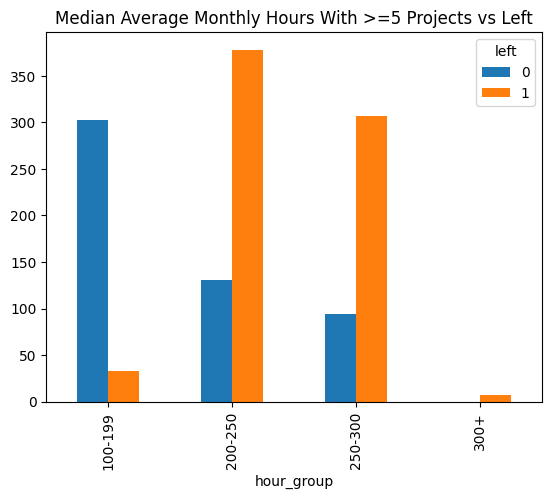

In [38]:
bins_1 = [100, 200, 250, 300, float('inf')]
labels_1 = ['100-199', '200-250', '250-300', '300+']
filtered_df_1 = filtered_df_1.assign(hour_group=pd.cut(filtered_df_1['average_monthly_hours'], bins=bins_1, labels=labels_1, right=False))
pd.crosstab(index=filtered_df_1['hour_group'], columns=filtered_df_1['left']).plot(kind="bar", title="Median Average Monthly Hours With >=5 Projects vs Left")

In [39]:
condition_three= df["time_spend_company"] ==3
thirdyear= df[condition_three]
thirdyear

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,evaluation_comparison
0,0.38,0.53,2,157,3,0,1,0,sales,low,bad_eval
4,0.37,0.52,2,159,3,0,1,0,sales,low,bad_eval
5,0.41,0.50,2,153,3,0,1,0,sales,low,bad_eval
9,0.42,0.53,2,142,3,0,1,0,sales,low,bad_eval
10,0.45,0.54,2,135,3,0,1,0,sales,low,bad_eval
...,...,...,...,...,...,...,...,...,...,...,...
14992,0.40,0.48,2,155,3,0,1,0,support,low,bad_eval
14994,0.40,0.57,2,151,3,0,1,0,support,low,bad_eval
14995,0.37,0.48,2,160,3,0,1,0,support,low,bad_eval
14996,0.37,0.53,2,143,3,0,1,0,support,low,bad_eval


<Axes: title={'center': 'Salary Comparison for Third-Year Employees vs Left'}, xlabel='salary'>

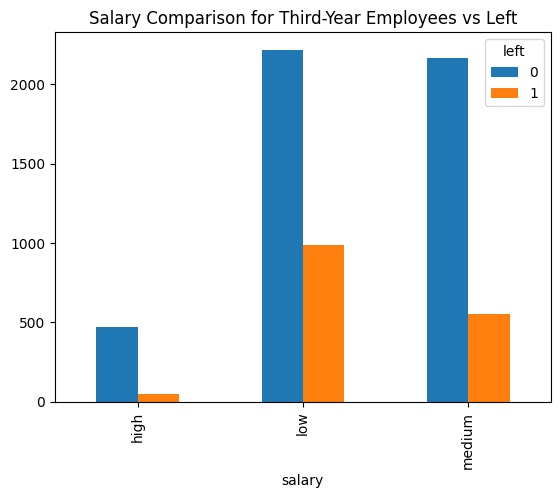

In [40]:
pd.crosstab(index=[thirdyear['salary']], columns=[thirdyear['left']]).plot(kind="bar", title="Salary Comparison for Third-Year Employees vs Left")

<Axes: title={'center': 'Department-wise Comparison of Third Year Employees'}, xlabel='Department'>

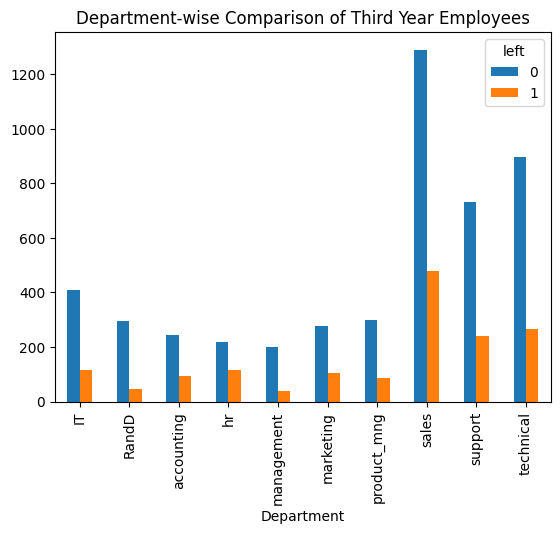

In [41]:
pd.crosstab(index=[thirdyear['Department']], columns=[thirdyear['left']]).plot(kind="bar",title="Department-wise Comparison of Third Year Employees")

<Axes: title={'center': 'Comparison of Number of Projects for Third-Year Employees vs Left'}, xlabel='number_project'>

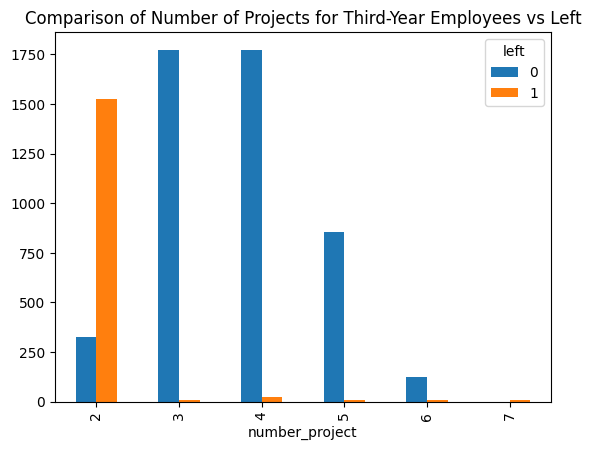

In [42]:
pd.crosstab(index=[thirdyear['number_project']], columns=[thirdyear['left']]).plot(kind="bar",title="Comparison of Number of Projects for Third-Year Employees vs Left")

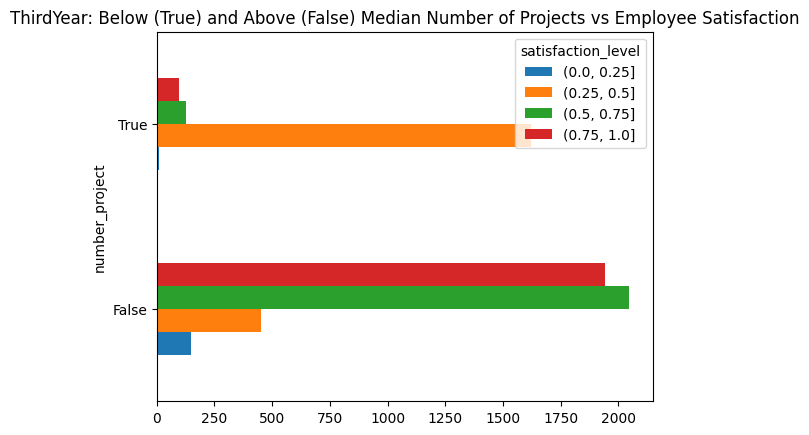

In [43]:
median_number_project = thirdyear["number_project"].median()
below_median_numpr_level = thirdyear["number_project"] < median_number_project
bins2 = [0, 0.25, 0.5, 0.75, 1]
new_sat_level = pd.cut(thirdyear['satisfaction_level'], bins=bins2)
cross_tab = pd.crosstab(index=[below_median_numpr_level], columns=new_sat_level).plot(kind="barh", title="ThirdYear: Below (True) and Above (False) Median Number of Projects vs Employee Satisfaction")
